In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('c:/vgsales.csv')
# load data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


    This dataset show us the video games sales in the world and different regions. It tells us a lot of interesting information. For example, we can know the fashion of Genres of Games in the world or different regions. I can get this information by gathering these Genres and look for the changes in their Global Sales. I can also see the development of the video game industry in the world by seeing the Global Sales of all games every year. This dataset can give us a lot of interesting information.

In [19]:
df.iloc[:,7:11].describe()

,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,2999.000000,2999.000000,2999.000000,2999.000000
mean,0.625288,0.271941,0.202397,2.156355
std,1.055742,0.671790,0.405958,3.171873
min,0.000000,0.000000,0.000000,0.680000
25%,0.180000,0.000000,0.060000,0.920000
50%,0.380000,0.010000,0.110000,1.310000
75%,0.680000,0.220000,0.210000,2.180000
max,29.020000,10.220000,10.570000,82.740000


In [20]:
print(df.dtypes)
print('===========')
print(df.info())

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 11 columns):
Rank            2999 non-null int64
Name            2999 non-null object
Platform        2999 non-null object
Year            2959 non-null float64
Genre           2999 non-null object
Publisher       2995 non-null object
NA_Sales        2999 non-null float64
EU_Sales        2999 non-null float64
JP_Sales        2999 non-null float64
Other_Sales     2999 non-null float64
Global_Sales    2999 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 257.8+ KB
None


For the 'Name','Genre' which should be present in English is object type. All the Sales data are float type. The 'year' data is also float type but I think it's better be of Int type.

In [27]:
#Clean the dataset

#remove unuseful information for this analysis
for col in ['NA_Sales','JP_Sales','Other_Sales','EU_Sales','Rank','Year']:
    if col in df:
        del df[col]
df_grouped = df.groupby(by=['Platform','Publisher']).sum().sort('Global_Sales',ascending=False)

print (df_grouped)

                                                 Global_Sales
Platform Publisher                                           
Wii      Nintendo                                      378.65
DS       Nintendo                                      327.62
PS2      Electronic Arts                               225.45
GB       Nintendo                                      225.35
NES      Nintendo                                      182.89
PS       Sony Computer Entertainment                   160.70
X360     Microsoft Game Studios                        155.97
         Electronic Arts                               152.97
3DS      Nintendo                                      147.70
PS3      Electronic Arts                               146.44
X360     Activision                                    136.35
PS2      Sony Computer Entertainment                   133.14
PS3      Sony Computer Entertainment                   130.01
N64      Nintendo                                      122.65
PS3     

C:\Users\Wang\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


We can see that the most successful publisher is Nintendo. Its platform and games sell best in the world!

In [6]:
df.dropna(inplace=True)
# there are some data missing in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2957 entries, 0 to 2998
Data columns (total 11 columns):
Rank            2957 non-null int64
Name            2957 non-null object
Platform        2957 non-null object
Year            2957 non-null float64
Genre           2957 non-null object
Publisher       2957 non-null object
NA_Sales        2957 non-null float64
EU_Sales        2957 non-null float64
JP_Sales        2957 non-null float64
Other_Sales     2957 non-null float64
Global_Sales    2957 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 277.2+ KB
None


I do find that there're some data missing from the dataset. Some of these are the 'year' data, others are the 'Publisher' data. For it only dominate small amount of the dataset, I delete them all. The reason that why these data  is lost is because some of them are too old and some games are published by individuals. It's hard to find the specific information for these kind of games.

In [127]:
df_imputed['Year_range'] = pd.cut(df_imputed.Year,[1979,1990,2000,2010,2020],
                                 labels=['80s','90s','00s','10s-Now']) # this creates a new variable

df_imputed.Year_range.describe()

count     2994
unique       4
top        00s
freq      1668
Name: Year_range, dtype: object

In [10]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

         Rank  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                                  
1980.0   7214      9.34      0.59      0.00         0.11         10.04
1981.0  30898     24.27      1.44      0.00         0.28         25.99
1982.0  20204     17.40      1.07      0.00         0.20         18.66
1983.0  14242      4.98      0.62      8.10         0.12         13.82
1984.0  16613     33.02      2.09     14.27         0.70         50.09


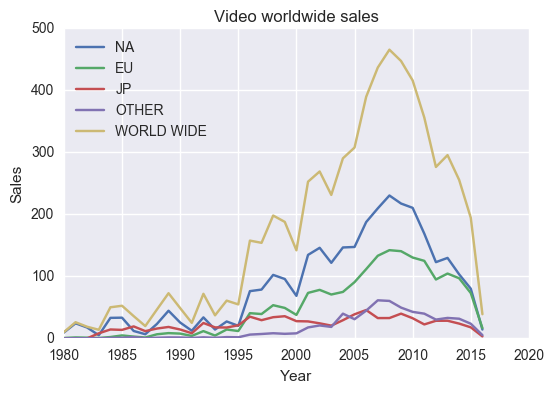

In [28]:
df = pd.read_csv('c:/vgsales.csv')
total_sales_group = df.groupby(['Year']).sum()
print(total_sales_group.head())
df=total_sales_group
year = df.index.values
na = df.NA_Sales
eu = df.EU_Sales
jp = df.JP_Sales
other = df.Other_Sales
global_ = df.Global_Sales
region_list = [na, eu, jp, other, global_]
columns = ['NA', 'EU', 'JP', 'OTHER', 'WORLD WIDE']

for i, region in enumerate(region_list):
     plt.plot(year, region, label = columns[i])

plt.ylabel('Sales')
plt.xlabel('Year')
plt.title('Video worldwide sales')
plt.legend(loc='upper left', prop = {'size':10})
plt.show()

We can see the development of video games in last decades all over the wolrd. The peak is around year 2008. The economic crisis do have a great impact on the world wide sales.

In [12]:
df = pd.read_csv('c:/vgsales.csv')
for col in ['NA_Sales','JP_Sales','Other_Sales','EU_Sales','Rank']:
    if col in df:
        del df[col]
Publisher_group = df.groupby(['Year','Publisher']).sum()
print(Publisher_group.Global_Sales)

Year    Publisher                             
1980.0  Activision                                 1.92
        Atari                                      8.12
1981.0  20th Century Fox Video Games               0.79
        Activision                                 7.20
        Atari                                      6.68
        Coleco                                     1.46
        Imagic                                     4.45
        Men-A-Vision                               0.77
        Mystique                                   0.82
        Parker Bros.                               3.13
        Tigervision                                0.69
1982.0  Atari                                     17.79
        Quelle                                     0.87
1983.0  Activision                                 1.31
        Atari                                      1.55
        Nintendo                                  10.96
1984.0  Hudson Soft                                1.10
 

C:\Users\Wang\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


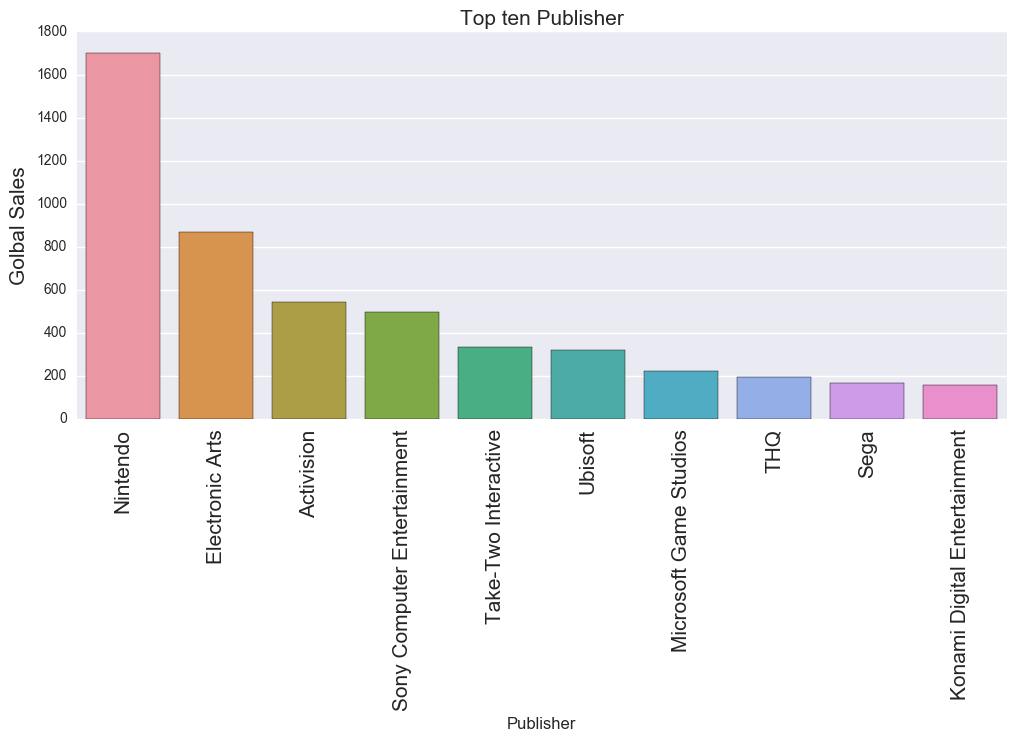

In [13]:
Publisher_group = df.groupby(['Publisher']).sum().sort('Global_Sales',ascending=False).iloc[0:10,:]
a=Publisher_group.index
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(x=a,y=Publisher_group.Global_Sales,ax=ax)
plt.title('Top ten Publisher',fontsize=15)
plt.xlabel('Publisher',fontsize=12)
plt.ylabel('Golbal Sales',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=90)

The Nintendo the is strongest Publisher in the world. Its total global sales is almost twice as much as the second Publisher.

C:\Users\Wang\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


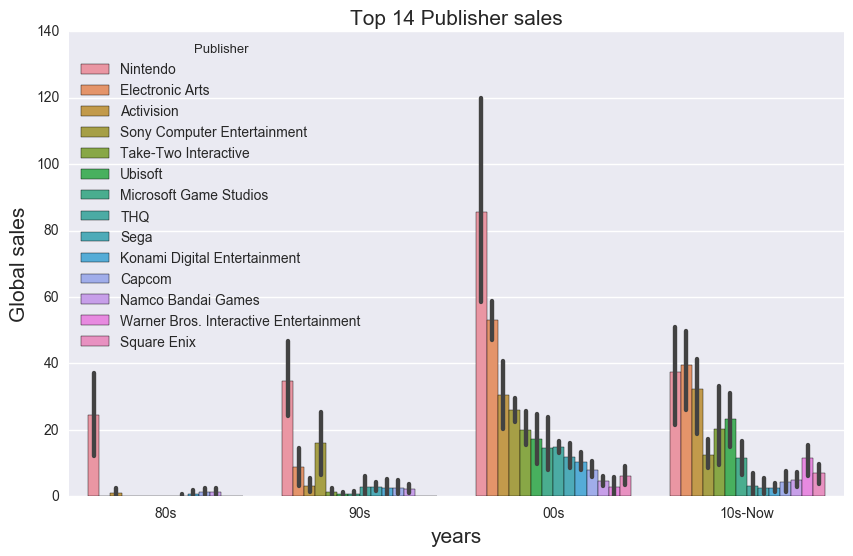

In [14]:
min_year = int(df['Year'].dropna().min())
max_year = int(df['Year'].dropna().max())
year_range = range(min_year,max_year+1)
publisher_list=df.Publisher.unique()
publisher_Top14 = df.groupby(['Publisher']).sum().sort('Global_Sales',ascending=False).iloc[0:14,:].index[0:14]
columns = ['Publisher','year','Global_Sales']
publisher_EachYear = pd.DataFrame(columns = columns)

for publisher in publisher_Top14:
    This_publisher = df[df['Publisher'] == publisher]
    for year in year_range:
        Input = pd.DataFrame([[publisher,year,This_publisher[This_publisher['Year'] == year]['Global_Sales'].sum()]],
                             columns=columns)
        publisher_EachYear = publisher_EachYear.append(Input)
        
publisher_EachYear.fillna(0,inplace=True)
publisher_EachYear['Ages'] =pd.cut(publisher_EachYear['year'],[1979,1990,2000,2010,2020],
                                 labels=['80s','90s','00s','10s-Now'])
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=publisher_EachYear,x = 'Ages',y='Global_Sales',hue='Publisher')
plt.xlabel('years',fontsize=15)
plt.ylabel('Global sales',fontsize=15)
plt.title('Top 14 Publisher sales',fontsize=15)

We can see that the Nintendo almost monopolized the Game Market in 80s. After 2000,this phenomenon changed.

C:\Users\Wang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


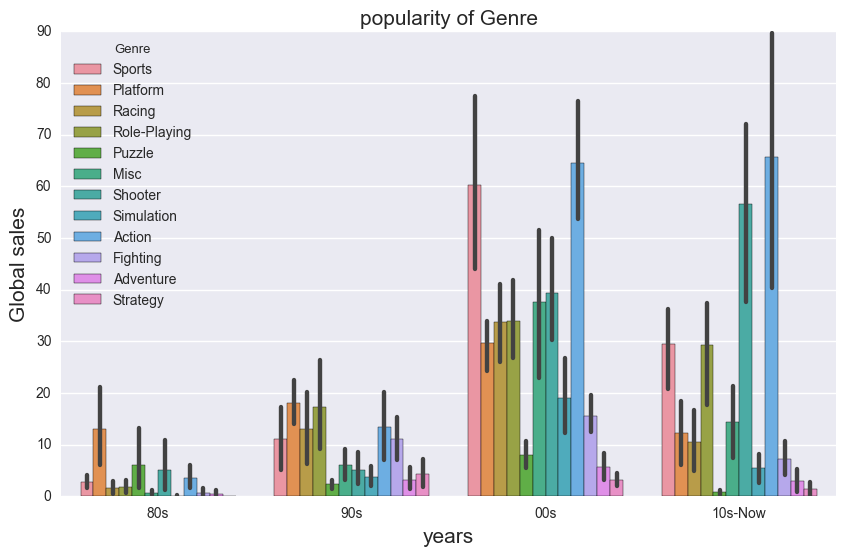

In [15]:
Genre_list=df.Genre.unique()
Genre_rank = df.groupby(['Genre']).sum().sort('Global_Sales',ascending=False)
columns = ['Genre','year','Global_Sales']
Genre_EachYear = pd.DataFrame(columns = columns)
for Genre in Genre_list:
    This_Genre = df[df['Genre'] == Genre]
    for year in year_range:
        Input = pd.DataFrame([[Genre,year,This_Genre[This_Genre['Year'] == year]['Global_Sales'].sum()]],
                             columns=columns)
        Genre_EachYear = Genre_EachYear.append(Input)       
Genre_EachYear.dropna(inplace=True)
Genre_EachYear['Ages'] =pd.cut(Genre_EachYear['year'],[1979,1990,2000,2010,2020],
                                 labels=['80s','90s','00s','10s-Now'])
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=Genre_EachYear,x = 'Ages',y='Global_Sales',hue='Genre')
plt.xlabel('years',fontsize=15)
plt.ylabel('Global sales',fontsize=15)
plt.title('popularity of Genre',fontsize=15)

We can see that the Action games grows rapidly after in 00s. This is most like ascribed to the technology break. 

C:\Users\Wang\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Covariance matrix 
[[ 1.01694915  0.29516983  0.67590673]
 [ 0.29516983  1.01694915 -0.19306172]
 [ 0.67590673 -0.19306172  1.01694915]]
Eigenvectors 
[[ 0.66461477 -0.72319809 -0.18780772]
 [-0.38872023 -0.12000231 -0.91350754]
 [-0.63810955 -0.68013526  0.36087703]]

Eigenvalues 
[ 0.19535889  1.70158738  1.15390118]
Vectors U:
 [[-0.72319809  0.18780772  0.66461477]
 [-0.12000231  0.91350754 -0.38872023]
 [-0.68013526 -0.36087703 -0.63810955]]
Everything ok!
Eigenvalues in descending order:
1.67322759319
1.1346694961
0.192102910714
Matrix W:
 [[-0.72319809 -0.18780772]
 [-0.12000231 -0.91350754]
 [-0.68013526  0.36087703]]


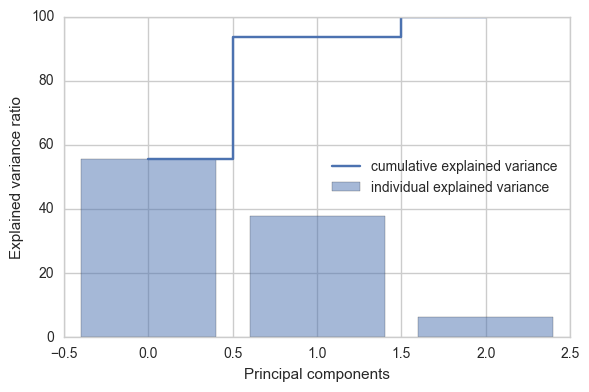

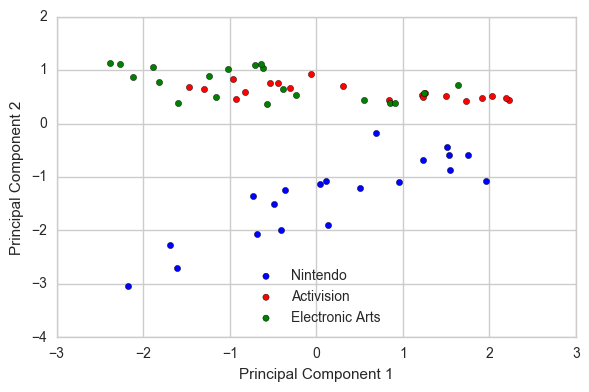

In [29]:
df = pd.read_csv('c:/vgsales.csv')
min_year = int(df['Year'].dropna().min())
max_year = int(df['Year'].dropna().max())
year_range = range(min_year,max_year+1)
publisher_list=df.Publisher.unique()
publisher_Top14 = df.groupby(['Publisher']).sum().sort('Global_Sales',ascending=False).iloc[0:3,:].index[0:3]
columns = ['Publisher','year','NA_Sales','JP_Sales','EU_Sales','Global_Sales']
publisher_EachYear = pd.DataFrame(columns = columns)

for publisher in publisher_Top14:
    This_publisher = df[df['Publisher'] == publisher]
    for year in year_range:
        Input = pd.DataFrame([[publisher,year,This_publisher[This_publisher['Year'] == year]['NA_Sales'].sum(),
                               This_publisher[This_publisher['Year'] == year]['JP_Sales'].sum(),
This_publisher[This_publisher['Year'] == year]['EU_Sales'].sum(),
        This_publisher[This_publisher['Year'] == year]['Global_Sales'].sum()]],
                             columns=columns)
        publisher_EachYear = publisher_EachYear.append(Input)
        
publisher_EachYear.dropna(inplace=True)
a=publisher_EachYear.iloc[3:23]
b=publisher_EachYear.iloc[54:74]
c=publisher_EachYear.iloc[91:115]
columns = ['Publisher','year','NA_Sales','JP_Sales','EU_Sales','Global_Sales']
data = pd.DataFrame(columns = columns)
e=a.append(b).append(c)

X = e.ix[:,2:5].values
y = e.ix[:,0].values
         
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)


u,s,v = np.linalg.svd(X_std.T)

print('Vectors U:\n', u)
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(3), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), 
                      eig_pairs[1][1].reshape(3,1)))

print('Matrix W:\n', matrix_w)
Y = X_std.dot(matrix_w)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Nintendo', 'Activision', 'Electronic Arts'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()

The three classes in the dataset are:
1.	Nintendo (n=20)
2.	Activision (n=20)
3.	Electronic Arts (n=20)
And the four features of in dataset are:
1.	NA_Sales 
2.	JP_Sales
3.	EU_Sales 
4.	Global_Sales

First we calculate the covariance matrix,Next, we perform an eigendecomposition on the covariance matrix.


Eigendecomposition of the standardized data based on the correlation matrix.And then, we use the common approach  to rank the eigenvalues from highest to lowest in order choose the top k eigenvector


    the explained variance tells us how much information (variance) can be attributed to each of the principal components.At last, we project the data onto the New Feature Space.